<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/03_Parteien%2C_Wahlen_und_Regierungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parteien, Wahlen und Regierungen**

In dieser Lektion beschäftigen wir uns mit Daten zu Parteien, Wahlen und Regierungen. Dazu gibt es verschiedene Datensätze, einen der umfangreichsten hat das [ParlGov project](https://www.parlgov.org/) zusammengetragen.
Unter [Data](https://www.parlgov.org/data-info/) kann man sich die einzelnen Datenquellen ansehen. Diese liegen für Parteien, Wahlen und Kabinette getrennt vor, welche wiederum über ids miteinander verknüpft werden können.
Wir lesen uns zunächst die unterschiedlichen Datensätze ein und werfen einen Blick darauf.

In [2]:
# setup
library(tidyverse)
library(readr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Rohdaten von Parlgov einlesen
parties <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_party.csv",
                    locale = locale(encoding = "ISO-8859-1"))                
elections <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_election.csv",
                      locale = locale(encoding = "ISO-8859-1"))
cabinets <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_cabinet.csv",
                     locale = locale(encoding = "ISO-8859-1"))

Rows: 1675 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): country_name_short, country_name, party_name_short, party_name_eng...
dbl (15): left_right, state_market, liberty_authority, eu_anti_pro, cmp, eup...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8859 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_name_short, country_name, election_type, party_name_short,...
dbl  (9): vote_share, seats, seats_total, left_right, country_id, election_i...
date (1): election_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12451 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Del

In [4]:
# Blick in die Daten
glimpse(parties)

parties %>%
  filter(country_name == "Germany")

Rows: 1,675
Columns: 23
$ country_name_short <chr> "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "A…
$ country_name       <chr> "Australia", "Australia", "Australia", "Australia",…
$ party_name_short   <chr> "ACP-V", "AD", "AG", "ALP", "AP", "C", "CDP", "CLP"…
$ party_name_english <chr> "Australian Country Party (Vic)", "Australian Democ…
$ party_name         <chr> "Australian Country Party (Vic)", "Australian Democ…
$ party_name_ascii   <chr> "Australian Country Party (Vic)", "Australian Democ…
$ family_name_short  <chr> "con", "soc", "eco", "soc", "lib", "con", "chr", "c…
$ family_name        <chr> "Conservative", "Social democracy", "Green/Ecologis…
$ left_right         <dbl> 7.4000, 3.7004, 1.5439, 3.8833, 6.0000, 7.4000, 6.2…
$ state_market       <dbl> 6.4000, 3.3684, 1.2982, 4.0351, 6.7000, 6.4000, 5.7…
$ liberty_authority  <dbl> 6.9000, 1.1579, 0.5614, 3.2632, 3.6000, 6.9000, 7.1…
$ eu_anti_pro        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ cmp           

country_name_short,country_name,party_name_short,party_name_english,party_name,party_name_ascii,family_name_short,family_name,left_right,state_market,⋯,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,country_id,party_id,family_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DEU,Germany,AfD,Alternative for Germany,Alternative fÃ¼r Deutschland,Alternative fuer Deutschland,right,Right-wing,8.8000,5.9000,⋯,NA,NA,NA,NA,NA,NA,NA,54,2253,40
DEU,Germany,B90/Gr,Alliance 90 / Greens -- Citizens' Movement,BÃ¼ndnis 90 / GrÃ¼ne â BÃ¼rgerInnenbewegung,Buendnis 90 / Gruene -- BuergerInnenbewegung,eco,Green/Ecologist,2.5000,2.5000,⋯,NA,NA,NA,NA,NA,NA,NA,54,255,19
DEU,Germany,B90/Gru,Alliance 90 / Greens,BÃ¼ndnis 90 / Die GrÃ¼nen,Buendnis 90 / Die Gruenen,eco,Green/Ecologist,2.9308,4.3268,⋯,115,1276113,802,1502,305,6015,304,54,772,19
DEU,Germany,BBB,Bavarian Peasants' League,Bayerischer Bauernbund,Bayerischer Bauernbund,lib,Liberal,6.0000,6.7000,⋯,NA,NA,NA,NA,NA,NA,NA,54,2701,6
DEU,Germany,BFB,Confederation of free citizens -- Offensive for Germany,Bund freier BÃ¼rger â Offensive fÃ¼r Deutschland,Bund freier Buerger -- Offensive fuer Deutschland,right,Right-wing,8.8000,5.9000,⋯,NA,NA,NA,NA,NA,NA,NA,54,1720,40
DEU,Germany,BLB,Baden Rural Federation,Badischer Landbund,Badischer Landbund,agr,Agrarian,5.3000,4.9000,⋯,NA,NA,NA,NA,NA,NA,NA,54,2707,2
DEU,Germany,BP,Bavarian Party,Bayernpartei,Bayernpartei,con,Conservative,7.4000,6.4000,⋯,NA,NA,NA,NA,NA,NA,NA,54,1131,26
DEU,Germany,BVP,Bavarian People's Party,Bayerische Volkspartei,Bayerische Volkspartei,chr,Christian democracy,6.2000,5.7000,⋯,NA,NA,NA,NA,NA,NA,NA,54,2697,3
DEU,Germany,BWB,Farmers and Wine Growers Association,Bauern- und WeingÃ¤rtnerbund,Bauern- und Weingaertnerbund,agr,Agrarian,5.3000,4.9000,⋯,NA,NA,NA,NA,NA,NA,NA,54,2703,2


Um die drei Datensätze miteinander zu verbinden, eignet sich die Funktion *left_join*. Zuerst lassen wir den Datensatz *elections* über eine Pipe in den *left_join* Befehl laufen. In diesem Befehl geben wir dann den Datensatz an, mit dem *elections* verbunden werden soll (hier also *cabinets*). Der Parameter by gibt an anhand welcher Variablen die Datensätze verbunden werden sollen. In diesem Fall sind *election_date* und *party_id* in beiden Datensätzen identisch. Gleiches machen wir mit dem *parties* Datensatz. Die restlichen Parameter in dieser Befehlskette sorgen dafür, dass Variablen, die mit *.y* oder *.z* aufhören ausgeschlossen werden. Das kann beim Verbinden von Datensätzen passieren, wenn beispielsweise zwei Variablen mit gleichem Namen in den Datensätzen vorkommen. Dann bekommt eine der Variablen *.y* oder *.z*. Da es hier in beiden Datensätzen einige gleichnamige Variablen gibt, könnte es ohne diese Befehle schnell übersichtlich werden.

In [5]:
# merge elections, cabinets, parties
parlgov <- elections %>% 
  left_join(cabinets, by = c("election_date", "party_id"), suffix = c("", ".y")) %>%  
  left_join(parties, by = "party_id", suffix = c("", ".z")) %>% 
  select(-contains(".y"), -contains(".z"))

glimpse(parlgov)

parlgov %>%
  filter(country_name == "Germany", election_date == "2021-09-26")

Warning message in left_join(., cabinets, by = c("election_date", "party_id"), suffix = c("", :
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


Rows: 14,921
Columns: 38
$ country_name_short              <chr> "AUS", "AUS", "AUS", "AUS", "AUS", "AU…
$ country_name                    <chr> "Australia", "Australia", "Australia",…
$ election_type                   <chr> "parliament", "parliament", "parliamen…
$ election_date                   <date> 1901-03-30, 1901-03-30, 1901-03-30, 1…
$ vote_share                      <dbl> 44.4, 44.4, 34.2, 34.2, 19.4, 19.4, 1.…
$ seats                           <dbl> 32, 32, 26, 26, 15, 15, 1, 1, 1, 1, 26…
$ seats_total                     <dbl> 75, 75, 75, 75, 75, 75, 75, 75, 75, 75…
$ party_name_short                <chr> "PP", "PP", "FTP", "FTP", "ALP", "ALP"…
$ party_name                      <chr> "Protectionist Party", "Protectionist …
$ party_name_english              <chr> "Protectionist Party", "Protectionist …
$ left_right                      <dbl> 7.4000, 7.4000, 6.0000, 6.0000, 3.8833…
$ country_id                      <dbl> 33, 33, 33, 33, 33, 33, 33, 33, 33, 33…
$ election_id  

country_name_short,country_name,election_type,election_date,vote_share,seats,seats_total,party_name_short,party_name,party_name_english,⋯,eu_anti_pro,cmp,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,family_id
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DEU,Germany,parliament,2021-09-26,25.74,206,736,SPD,Sozialdemokratische Partei Deutschlands,Social Democratic Party of Germany,⋯,7.9318,41320,120,1276320,803,1503,302,6087,302,11
DEU,Germany,parliament,2021-09-26,18.90,152,736,CDU,Christlich Demokratische Union,Christian Democratic Union,⋯,8.5024,41521,116,1276521,805,1505,301,5943,301,3
DEU,Germany,parliament,2021-09-26,14.75,118,736,B90/Gru,BÃ¼ndnis 90 / Die GrÃ¼nen,Alliance 90 / Greens,⋯,7.6101,41113,115,1276113,802,1502,305,6015,304,19
DEU,Germany,parliament,2021-09-26,11.46,92,736,FDP,Freie Demokratische Partei,Free Democratic Party,⋯,8.4855,41420,119,1276420,804,1504,303,5997,303,6
DEU,Germany,parliament,2021-09-26,10.34,83,736,AfD,Alternative fÃ¼r Deutschland,Alternative for Germany,⋯,2.3000,NA,NA,NA,NA,NA,NA,NA,NA,40
DEU,Germany,parliament,2021-09-26,5.17,45,736,CSU,Christlich Soziale Union,Christian Social Union,⋯,6.6680,41521,117,1276521,806,1506,309,5943,308,3
DEU,Germany,parliament,2021-09-26,4.89,39,736,PDS|Li,PDS | Die Linke,PDS | The Left,⋯,4.3508,41221,NA,NA,NA,1501,307,6051,306,14
DEU,Germany,parliament,2021-09-26,0.12,1,736,SSW,SÃ¼dschleswigscher WÃ¤hlerverband,South Schleswig Voter League,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,16
DEU,Germany,parliament,2021-09-26,2.43,0,736,FW,Freie WÃ¤hler,Free Voters,⋯,7.9000,NA,121,NA,NA,NA,NA,NA,NA,26


## Positionen darstellen
Dieser vollständige ParlGov Datensatz gibt uns jetzt Auskunft über eine Vielzahl an Charakteristiken verschiedenster Parteien. Beispielsweise ihre position auf einer allgemeinen Links-Rechts-Skala, aber auch ihre Positionen zu spezifischen Policies wie EU, Marktwirtschaft oder Liberal vs. Authoritär. Schauen wir uns doch einmal an, welche Werte deutsche Parteien hier bekommen haben. Da man in den Politikwissenschaften davon ausgeht, dass ideologisch nahe Parteien eher dazu neigen eine Koalition einzugehen, kann uns dies dabei helfen erste schlüsse über mögliche Koalitionen zu ziehen.

Positionen/Koalitionsoptionen

In [6]:
# Welche Daten zu Parteipositionen gibt es und wie sind diese skaliert?
parlgov %>%
  filter(country_name == "Germany") %>%
  distinct(party_name_short, left_right, state_market, liberty_authority, eu_anti_pro)

fivenum(parlgov$state_market)

party_name_short,left_right,state_market,liberty_authority,eu_anti_pro
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SPD,3.6451,3.8443,3.9791,7.9318
DDP,6.0000,6.7000,3.6000,8.7000
DZ,6.2000,5.7000,7.1000,8.3000
DNVP,8.8000,5.9000,8.5000,2.3000
DVP,7.4000,6.4000,6.9000,7.9000
USPD,1.3000,1.4000,3.0000,3.3000
BVP,6.2000,5.7000,7.1000,8.3000
BBB,6.0000,6.7000,3.6000,8.7000
DHP,7.4000,6.4000,6.9000,7.9000


[1] 0.2143 3.5000 5.2047 6.4000 9.4737

Als erster Überblick ganz nett. Jedoch lassen sich Aussagen viel besser anhand einer grafischen Darstellung treffen. Üblicherweise werden Parteien in den Politikwissenschaften zur Vereinfachung in einem zweidimensionalen Raum platziert. Die Achsen bilden dabei oft Plan- vs. Marktwirtschaft sowie Liberal vs. Authoritär. Lasst uns das anhand der Daten zur Wahl von 2021 für Partein mit einem Stimmanteil von über 5% darstellen. 

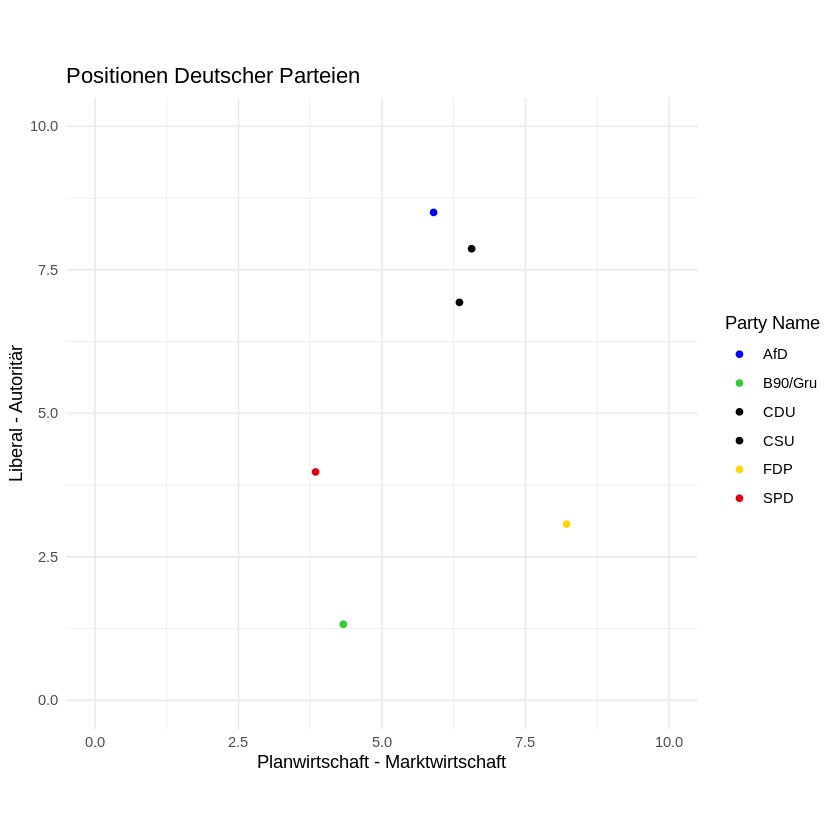

In [29]:
parlgov %>%
  filter(country_name == "Germany", election_date == "2021-09-26", vote_share >= 5) %>%
  ggplot(aes(x = state_market, y = liberty_authority, color = party_name_short)) +
  geom_point() +
  scale_color_manual(values = c("blue", "#32CD32", "black", "black", "#FFD600", "#E3000F")) +
  coord_fixed(ratio = 1, xlim = c(0, 10), y = c(0, 10)) +
  theme_minimal() +
  labs(x = "Planwirtschaft - Marktwirtschaft", y = "Liberal - Autoritär", title = "Positionen Deutscher Parteien", color = "Party Name")
  

## Effektive legislative/elektorale Parteienanzahl & Disproportionalität


Wir können diese Daten ebenfall nutzen um wichtige politikwissenschaftliche Kennzahlen zu errechen, welche dann in einer späteren Analyse verwendet werden können. Mit den ParlGov Daten lässt sich zum Beispiel die Anzahl effektiver Parteien nach Laakso & Taagepera (1979) berechnen. Hierbei handelt es sich um die Anzahl der Parteien innerhalb eine Parteisystem, gewichtet danach, dass nicht alle exisiterenden Parteien die gleiche Stärke besitzen. Entsprechend ist sie ein Maß für Fragmentierung. Man kann diese Kennzahl pro Land sowohl für die Anzahl effektiver Wahlparteien ausrechenen (hier verwendet man den Stimmenanteil in der Rechnung) oder für die Anzahl effektiver Parlamentsparteien (hier die Mandatsanteile bzw. Sitze). Diese werden quadriert und addiert und dann durch 1 geteilt. In den vielen Papieren sieht man vor allem die Anzahl effektiver Parteien im Parlament (ENPP). Nehmen wir uns diese mal vor. Die Formel sieht wie folgt aus:

\begin{align}
   \frac1{\sum_{i=1}^{n}v_i^2}
\end{align}

das v steht in diesem Fall für den relativen Anteil an Stimmen. Lasst uns diese Formel Schritt für Schritt in Code umsetzen:

In [9]:
parlgov2 <- parlgov %>% distinct(election_id,party_name_short, .keep_all = TRUE) #Im Datensatz sind manche Zeilen doppelt enthalten, da die Führung des Kabinetts sich geändert hat. Das filtern wir raus.

ENPP <- parlgov2 %>%
  group_by(election_date) %>%
  mutate(
    seat_share = seats/seats_total,  # Wir erstellen die relative Anzahl der Sitze pro Partei
    seat_sqrd = seat_share^2,        # Diese quadrieren wir dann
    seat_sum = sum(seat_sqrd),       # Dann summieren wir diese Zahlen
    ENPP = 1/seat_sum                # Und zum Schluss teilen wir das Ergebis durch 1
    ) %>%
  select(election_id, country_name, election_date, party_name_short, cabinet_party, vote_share, seats, seats_total, cabinet_name, cabinet_id, ENPP, seat_share,seat_sqrd, seat_sum)
  
ENPP

election_id,country_name,election_date,party_name_short,cabinet_party,vote_share,seats,seats_total,cabinet_name,cabinet_id,ENPP,seat_share,seat_sqrd,seat_sum
<dbl>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
731,Australia,1901-03-30,PP,1,44.4,32,75,Barton,996,2.919045,0.42666667,0.1820444444,0.3425778
731,Australia,1901-03-30,FTP,0,34.2,26,75,Barton,996,2.919045,0.34666667,0.1201777778,0.3425778
731,Australia,1901-03-30,ALP,0,19.4,15,75,Barton,996,2.919045,0.20000000,0.0400000000,0.3425778
731,Australia,1901-03-30,none,0,1.4,1,75,Barton,996,2.919045,0.01333333,0.0001777778,0.3425778
731,Australia,1901-03-30,one-seat,0,0.6,1,75,Barton,996,2.919045,0.01333333,0.0001777778,0.3425778
730,Australia,1903-12-16,PP,0,29.7,26,75,Watson,998,3.072092,0.34666667,0.1201777778,0.3255111
730,Australia,1903-12-16,FTP,0,34.4,25,75,Watson,998,3.072092,0.33333333,0.1111111111,0.3255111
730,Australia,1903-12-16,ALP,1,31.0,23,75,Watson,998,3.072092,0.30666667,0.0940444444,0.3255111
730,Australia,1903-12-16,one-seat,0,0.5,1,75,Watson,998,3.072092,0.01333333,0.0001777778,0.3255111


Gleichen können wir auch für die Anzahl effektiver Wahlparteien (ENEP) errechnen. Die Formel ist fast gleich, ersetzt den Stimmenanteil jedoch durch den Anteil der Sitze jeder Partei:
\begin{align}
   \frac1{\sum_{i=1}^{n}s_i^2}
\end{align}

In [10]:
ENEP <- parlgov2 %>%
  group_by(election_date) %>%
  mutate(
    vote_dez = vote_share/100,       # Wir erstellen eine Dezimalzahl des Stimmenanteils
    vote_sqrd = vote_dez^2,          # Diese quadrieren wir dann
    vote_sum = sum(vote_sqrd),       # Dann summieren wir diese Zahlen
    ENEP = 1/vote_sum                # Und zum Schluss teilen wir das Ergebis durch 1
    ) %>%
  select(election_id, country_name, election_date, party_name_short, cabinet_party, vote_share, seats, seats_total, cabinet_name, cabinet_id, ENEP, vote_share, vote_sqrd, vote_sum)
  
  ENEP

election_id,country_name,election_date,party_name_short,cabinet_party,vote_share,seats,seats_total,cabinet_name,cabinet_id,ENEP,vote_sqrd,vote_sum
<dbl>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
731,Australia,1901-03-30,PP,1,44.4,32,75,Barton,996,2.841167,0.197136,0.351968
731,Australia,1901-03-30,FTP,0,34.2,26,75,Barton,996,2.841167,0.116964,0.351968
731,Australia,1901-03-30,ALP,0,19.4,15,75,Barton,996,2.841167,0.037636,0.351968
731,Australia,1901-03-30,none,0,1.4,1,75,Barton,996,2.841167,0.000196,0.351968
731,Australia,1901-03-30,one-seat,0,0.6,1,75,Barton,996,2.841167,0.000036,0.351968
730,Australia,1903-12-16,PP,0,29.7,26,75,Watson,998,3.281970,0.088209,0.304695
730,Australia,1903-12-16,FTP,0,34.4,25,75,Watson,998,3.281970,0.118336,0.304695
730,Australia,1903-12-16,ALP,1,31.0,23,75,Watson,998,3.281970,0.096100,0.304695
730,Australia,1903-12-16,one-seat,0,0.5,1,75,Watson,998,3.281970,0.000025,0.304695


Auch diese Ergebnisse lassen sich grafisch besser verstehen. Vergleichen wir doch einfach mal drei Länder mit verschiedenen Wahlsystemen. Nach Dovergers Gesetz sollten wir dort je nach Wahlsystem unterschiedlich Anzahl an Parteien erkennen.

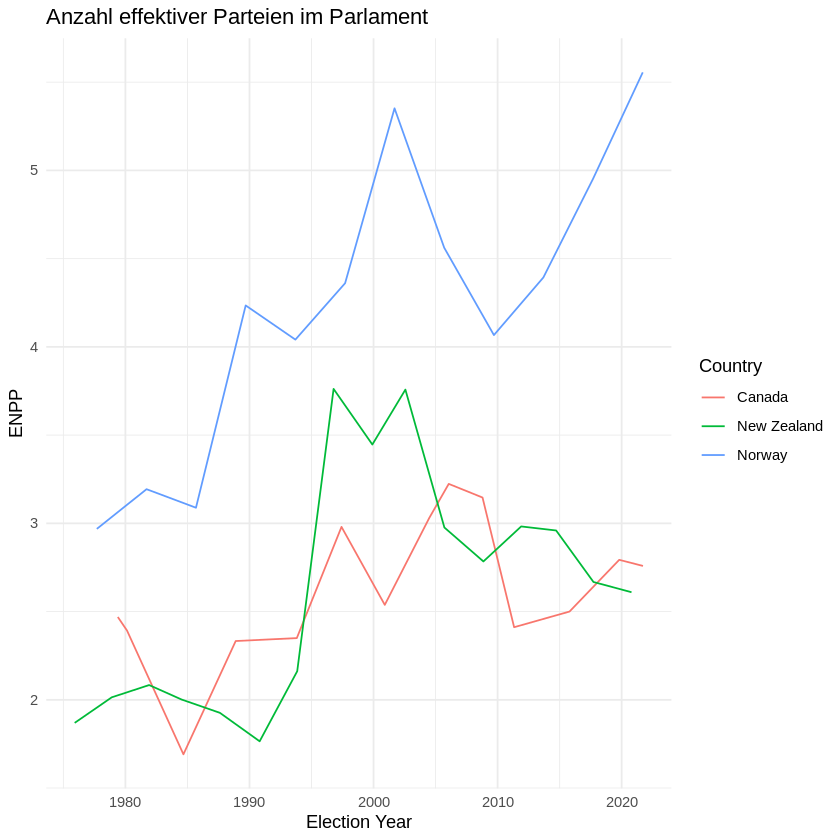

In [27]:
ENPP %>% 
  filter(election_date >= 1980-00-00) %>%
  filter(country_name == "New Zealand" | country_name == "Canada" | country_name == "Norway") %>% 
  ggplot() +
  geom_line(mapping = aes(x= election_date, y=ENPP, color = country_name)) +
  theme_minimal() + 
  labs(x = "Election Year", y = "ENPP", title = "Anzahl effektiver Parteien im Parlament", color = "Country")

Anhand der Daten kann man das tatsächlich beobachten. Zwar ist dies nicht die ideal Art und Weise um Duvergers Law zu testen, dennoch kann man sehen, dass Norwegen mit seinem Verhältniswahlsystem eine deutlich höhere Anzahl effektiver Parteien hat als Canada mit seinem Mehrheitswahlsystem. Das Neuseeländische Misch-Wahlsystem zeigt hingegen ähnliche Werte zu Kanada.

## **Dispropotioanlität**

Eine ähnliche Messzahl ist der Gallagher Index (auch bekannt als "Least Squares Index"). Dieser nutzt den Anteil der Stimmen und der Sitze einer Partei, um zu messen ob die Sitze den Stimmen entsprechend disproportional verteilt wurden. Die Formel sieht wie folgt aus:

\begin{align}
   \sqrt{\frac12 \sum_{i=1}^{n} (v_i - s_i)^2}
\end{align}

*v* steht hier für den Anteil der Stimmen jeder Partein und *s* für den Anteil der Sitze. Lasst uns die Formel einmal in Code umschreiben

In [24]:
LSq <- ENEP %>%
  group_by(election_date) %>%
  mutate(
    seat_share = (seats/seats_total)*100,
    Gallagher = sqrt((1/2)*sum((vote_share-seat_share)^2))
    ) %>%
  select(election_id, country_name, election_date, party_name_short, cabinet_party, vote_share, seats, seats_total, cabinet_name, cabinet_id, ENEP, vote_share, vote_sqrd, vote_sum, seat_share, Gallagher)

LSq

election_id,country_name,election_date,party_name_short,cabinet_party,vote_share,seats,seats_total,cabinet_name,cabinet_id,ENEP,vote_sqrd,vote_sum,seat_share,Gallagher
<dbl>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
731,Australia,1901-03-30,PP,1,44.4,32,75,Barton,996,2.841167,0.197136,0.351968,42.666667,1.436044
731,Australia,1901-03-30,FTP,0,34.2,26,75,Barton,996,2.841167,0.116964,0.351968,34.666667,1.436044
731,Australia,1901-03-30,ALP,0,19.4,15,75,Barton,996,2.841167,0.037636,0.351968,20.000000,1.436044
731,Australia,1901-03-30,none,0,1.4,1,75,Barton,996,2.841167,0.000196,0.351968,1.333333,1.436044
731,Australia,1901-03-30,one-seat,0,0.6,1,75,Barton,996,2.841167,0.000036,0.351968,1.333333,1.436044
730,Australia,1903-12-16,PP,0,29.7,26,75,Watson,998,3.281970,0.088209,0.304695,34.666667,4.840512
730,Australia,1903-12-16,FTP,0,34.4,25,75,Watson,998,3.281970,0.118336,0.304695,33.333333,4.840512
730,Australia,1903-12-16,ALP,1,31.0,23,75,Watson,998,3.281970,0.096100,0.304695,30.666667,4.840512
730,Australia,1903-12-16,one-seat,0,0.5,1,75,Watson,998,3.281970,0.000025,0.304695,1.333333,4.840512


Eine perfekt proportionale Verteilung würde ein 1 im Gallagher Index bedeuten. Am besten veranschaulichen lässt es sich erneut, wenn wir zwei verschiedene Wahlsystem vergleichen. Das Mehrheitswahlsystem sollte im Vergleich zum Verhältniswahlsystem eine höhere Disproportionalität aufweisen, da bei ersterem simple gesagt eine "Winner takes all" Logik gilt, während in zweitem die Sitze entsprechend den Stimmenanteilen verteilt werden. Dafür erstellen wir wieder eine Grafik mit *ggplot* und vergleichen die selben Länder wie vorher (da diese sehr Lückenlose daten im Datensatz haben):

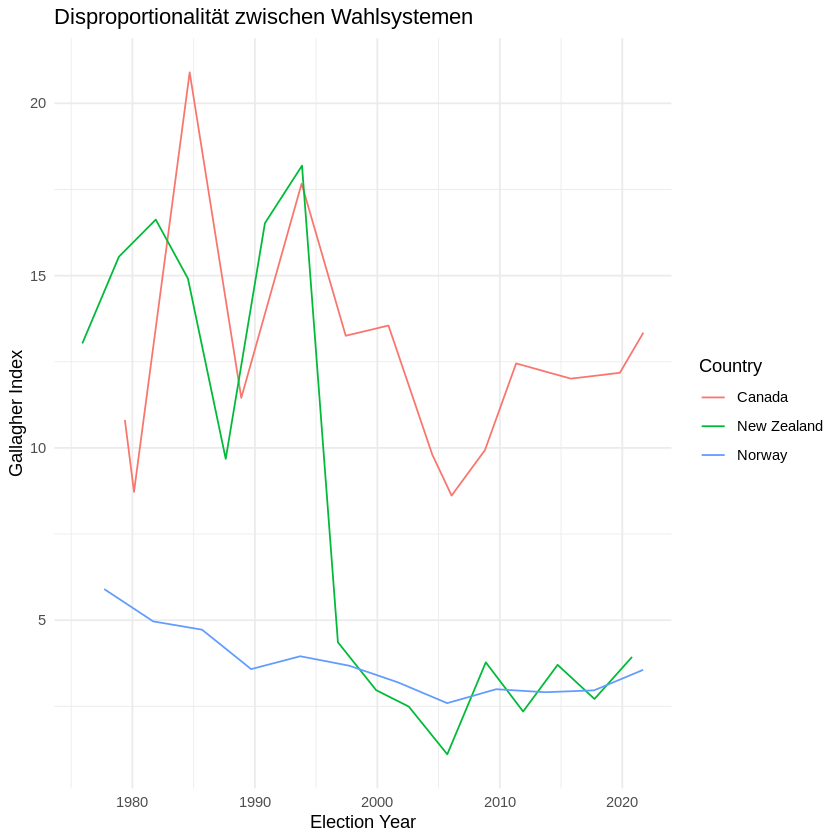

In [28]:
LSq %>% 
  filter(election_date >= 1980-00-00) %>%
  filter(country_name == "Canada" | country_name == "New Zealand" | country_name == "Norway") %>% 
  ggplot() +
  geom_line(mapping = aes(x= election_date, y=Gallagher, color = country_name)) +
  theme_minimal() +
  labs(x = "Election Year", y = "Gallagher Index", title = "Disproportionalität zwischen Wahlsystemen", color = "Country")

Wie erwartet, zeigt sich in Norwegen und somit dem Verhältniswahlsystem die geringste Disproportionalität. Diese scheint sogar über die Jahre zu leicht zu sinken. Kanada hat hingegen eine deutlich höhere Disproportionalität. Entsprechend dem Mehrheitswahlsystem in Kanada war das auch zu erwarten. Neuseeland hingegen ist hier ein sehr interessante beispiel. Neuseeland hat im Jahr 1993 vom Mehrheitswahlsystem zum Mischwahlsystem (nach deutschem Vorbild) gewechselt. Dieser wechselt hat sich deutlich positiv auf die Proportionalität ausgewirkt!

## Regierungstypen

In [21]:
cabinet_seats <- parlgov %>%
  group_by(cabinet_id) %>%
  mutate(
    cabinet_seats = sum(seats),
    cabinet_perc = seats/seats_total*100
    ) %>%
  select(country_name, election_date, party_name_short, cabinet_party, vote_share, seats, seats_total, cabinet_name, cabinet_id, cabinet_seats, cabinet_perc)
    

cabinet_seats

country_name,election_date,party_name_short,cabinet_party,vote_share,seats,seats_total,cabinet_name,cabinet_id,cabinet_seats,cabinet_perc
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Australia,1901-03-30,PP,1,44.4,32,75,Barton,996,75,42.666667
Australia,1901-03-30,PP,1,44.4,32,75,Deakin I,997,75,42.666667
Australia,1901-03-30,FTP,0,34.2,26,75,Barton,996,75,34.666667
Australia,1901-03-30,FTP,0,34.2,26,75,Deakin I,997,75,34.666667
Australia,1901-03-30,ALP,0,19.4,15,75,Barton,996,75,20.000000
Australia,1901-03-30,ALP,0,19.4,15,75,Deakin I,997,75,20.000000
Australia,1901-03-30,none,0,1.4,1,75,Barton,996,75,1.333333
Australia,1901-03-30,none,0,1.4,1,75,Deakin I,997,75,1.333333
Australia,1901-03-30,one-seat,0,0.6,1,75,Barton,996,75,1.333333


In [22]:
cabinet_seats %>%
  distinct(cabinet_id, .keep_all = TRUE) %>%
  arrange(cabinet_perc)

country_name,election_date,party_name_short,cabinet_party,vote_share,seats,seats_total,cabinet_name,cabinet_id,cabinet_seats,cabinet_perc
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Australia,1903-12-16,none,NA,4.50,0,75,NA,NA,NA,0.000000
Japan,1955-02-27,etc,0,NA,8,467,Hatoyama I III,900,14,1.713062
Japan,1955-02-27,etc,0,NA,8,467,Ishibashi,901,14,1.713062
Japan,1955-02-27,etc,0,NA,8,467,Kishi I,887,14,1.713062
Poland,1991-10-27,D|W|U,0,12.31,62,460,Olszewski,132,460,13.478261
Poland,1991-10-27,D|W|U,0,12.31,62,460,Pawlak I,605,460,13.478261
Poland,1991-10-27,D|W|U,1,12.31,62,460,Suchocka I,68,460,13.478261
Poland,1991-10-27,D|W|U,1,12.31,62,460,Suchocka II,730,460,13.478261
Belgium,1999-06-13,PVV|VLD,1,14.30,23,150,Verhofstadt I,193,174,15.333333


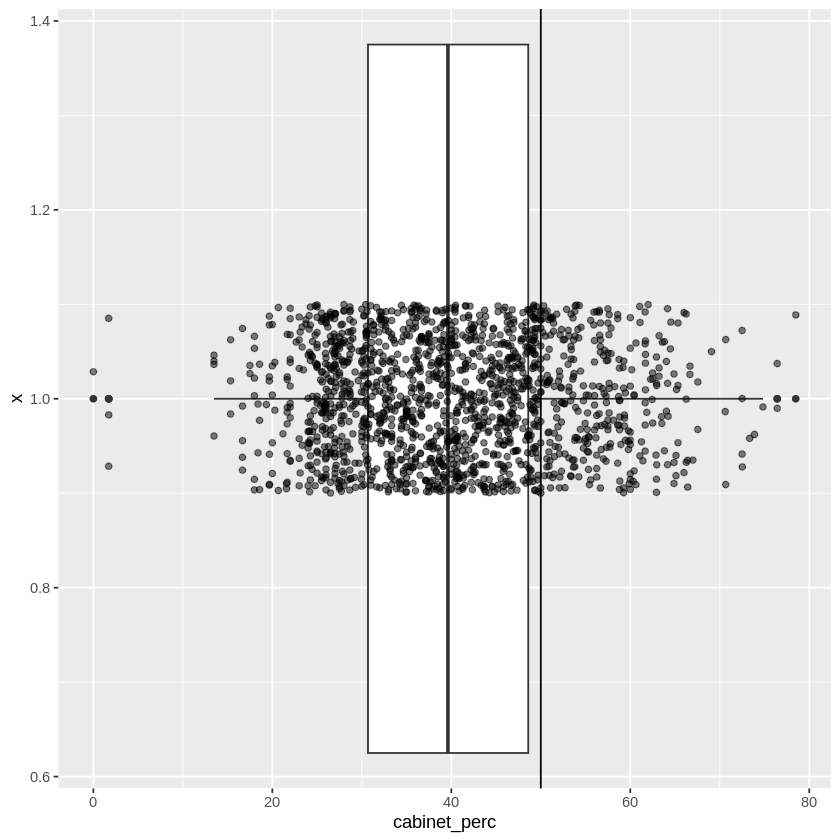

In [23]:
cabinet_seats %>%
  distinct(cabinet_id, .keep_all = TRUE) %>%
  ggplot(aes(x = 1, y = cabinet_perc)) +
  geom_boxplot() +
  geom_jitter(width = .1, alpha = .5) +
  geom_hline(yintercept = 50) +
  coord_flip()